In [1]:
# loading the MNIST dataset in Keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/Users/timhou/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GT 750M (0000:01:00.0)


In [2]:
# visualize one digit
import matplotlib.pyplot as plt
%matplotlib inline

print 'digit number:', test_labels[0]
test_samp = test_images[0]
print test_samp

digit number: 7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 24

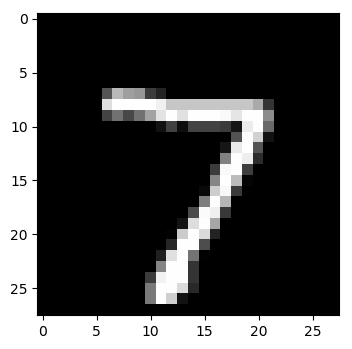

In [3]:
plt.imshow(test_samp, cmap='gray')

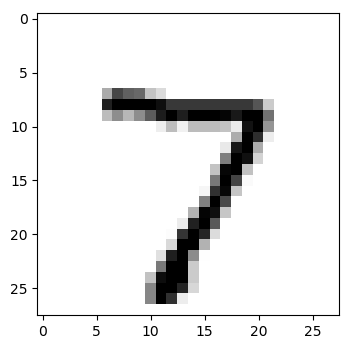

In [4]:
plt.imshow(test_samp, cmap='binary')

In [2]:
# 60,000 training grayscale images of 28x28 pixels into 10 categories of 0 to 9
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# 10,000 test grayscale images of 28x28 pixels into 10 categories of 0 to 9
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
# the network architecture
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [18]:
# the compilation step (learning process configuration)
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
# preparing the image data - reshaped into [0,1] interval from [0,255]
train_im = train_images.reshape((60000, 28 * 28)).astype('float32') / 255

test_im = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [20]:
# preparing the labels
from keras.utils import to_categorical

train_lab = to_categorical(train_labels)
test_lab = to_categorical(test_labels)

In [21]:
# fit the model to its training data
network.fit(train_im, train_lab, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2541 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1028 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0683 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0496 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0371 - acc: 0.9887


In [22]:
test_loss, test_acc = network.evaluate(test_im, test_lab)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 22us/step
('test_acc:', 0.9815)
